# Python Data Analysis (2022-2023)

### - Name: Paula Chazarra Giménez 
### - Date: 25/09/2022 
### - Master: IMAPP

## Description of project

The dataset considered in this project describes some music features which are used for musical genres classifications. Typically, this kind of data are behind algorithms that suggest new artists or new songs on streaming platform, based on what you have already listened.

### Structure

The project is structured in three parts, mimincking a realistic data analysis project : 
  + dataset properties and cleaning
  + data exploration
  + toward the design of predictive models

### Data

The data are organized within a `csv` file with 17 features and one "target" which can be organized as follow:

**Factual song properties**
+ `instance_id` is a unique identifier for each song
+ `artist_name` is name of the song artist 
+ `track_name` is the title of the song
+ `obtained_date` is supposed to be the date at which the song was released. Since information seems corrupted and will be ignored in this project.
+ `duration_ms` is the duration of the song, in milliseconds.

**Musical properties**
+ `tempo` measures the beats per minute (bpm) of a song. Many popular songs range from 50 bpm to 200 bpm. The tempo cannot be measured for all songs (*e.g.* variable tempo).
+ `key` is the tonality of the song, roughly high or low pitch (*e.g.* C key means the song is played in C tonality)
+ `mode` is (here) major or minor, which corresponds to two ways to use a given key. Major is usually associated to a happy feeling while mino is more on a dark or sad side.

**Perception properties**
+ `popularity` measures how much people like the song. It can be for example the number of views on a streaming platform, or the number of days in a chart (not exactly sure what is the exact definition).
+ `acousticness`. Songs with higher acousticness are more likely to use acoustic and non-electronic instruments. Acousticness is measured on a scale of 0 (not acoustic) to 100 (very acoustic).
+ `danceability` quantifies how suitable a track is for dancing based on a combination of musical elements, like tempo, rhythm, and beat. Songs with higher danceability have stronger and more regular beats.
+ `energy` measures the perceived intensity and activity of a song. Energy is also measured on a scale of 0 (low energy) to 100 (high energy).
+ `instrumentalness` predicts whether a track contains vocals. Instrumentalness is measured on a scale of 0 (likely contains vocal content) to 100 (likely contains no vocal content).
+ `liveness` detects the presence of an audience in a song. Liveness is measured on a scale of 0 (no audience) to 100 (audible audience).
+ `loudness` measures the decibel level of a song. Decibels are relative to a reference value, so songs with lower loudness values are quieter relative to the reference value of 0.
+ `speechiness` measures the presence of spoken words in a song. Speechiness is measured on a scale of 0 (low speechiness) to 100 (high speechiness).
+ `valence` measures the positivity of a song. Tupically, songs with higher valence sound happier and more cheerful. Valence is measured on a scale from 0 (low valence) to 100 (high valence).

**Gender**
+ `music_genre` is the known genre of the music. In the machine learning terminology, this is the *target*.

> --> **WE HAVE TO RUN THE CODE IN THE ORDER THAT IT APPEARS, IF NOT THEN SOME VARIABLES COULD BE REPLACED FOR OTHERS AND THERE ARE SOME ERRORS.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Dataset properties and cleaning (5 pts)

> **1.1** Download the dataset `https://github.com/rmadar/lecture-python/data/music_genre.csv`, clicking on [this link](https://github.com/rmadar/lecture-python/raw/master/data/music_genre.csv) (and save it on disk). Load it and find out how many songs and features per song are stored. (1 pts)

We load our data set and save it in a data frame

In [2]:
df=pd.read_csv('music_genre.csv')

 We check the dimensions of the data frame to know how many songs are stored and how many features each song has.

In [3]:
dimensions=np.shape(df)
print('At the first place, in our data set we have {} song entries and each song has {} features'.format(dimensions[0],dimensions[1]))
print('(if we do not count the obtained_date feature, then they are {} features)'.format(dimensions[1]-1))

features=df.columns.values
print('')
print('The features are:')
for i in features:
    print(i)

At the first place, in our data set we have 50005 song entries and each song has 18 features
(if we do not count the obtained_date feature, then they are 17 features)

The features are:
instance_id
artist_name
track_name
popularity
acousticness
danceability
duration_ms
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
obtained_date
valence
music_genre


We create a list which saves the number of songs left after every cleaning code.

In [4]:
cleaning=[]
cleaning.append(np.shape(df)[0])

> **1.2** How many valid songs are present ? Valid means "with all values look reasonnable". We could start checking, for example, that the `instance_id` values are all uniques, as it should. We also recommand to scrutinize the `tempo` feature, starting with the data type. (1.5 pts)

We check the type of data stored in each colum: 

In [5]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

We divide them between qualitative and quantitative features:

In [6]:
features=df.columns.values
features_float64=features[df.dtypes=='float64']
features_object=features[df.dtypes=='object']

print('Float64 type (quantitative) features: {} \nObject type (qualitative) features: {} '. format(len(features_float64),len(features_object)))


Float64 type (quantitative) features: 11 
Object type (qualitative) features: 7 


As we see, features which can be quantified are `float64` type, while qualitative features are `string` type. Except `tempo` feature, which is string type but as it defines a quantitative feature it should be float64 type. So we should change its type from object to float64. However we find an error because some values are '?' and cannot be converted into float. We have to drop the bad tempo values (we will do it later).

Taking in account this, we have 12 quantitative and 6 qualitative features.

To keep only the valid songs, we analyze each feature and create a mask to keep the consistent values. To do the data cleaning we should check:

- Blank spaces: rows with erased information.
- Instance_id: must be unique for each song.
- Duration_ms: must be a positive value.
- Popularity, danceability: must be a null or positive value.
- Acousticness, energy, instrumentalness, liveness, speechiness, valence: must be a value between 0 and 100.


**Blank spaces-cleaning.** We use a command `.dropna`  which erases the blank rows and replaces the data frame with the new one.

In [7]:
df.dropna(inplace=True)

print('We obtain {} good songs'.format(np.shape(df)[0]))
cleaning.append(np.shape(df)[0])
print('Number of deleted songs : {} '.format(cleaning[-2]-cleaning[-1]))

We obtain 50000 good songs
Number of deleted songs : 5 


**Instance_id cleaning.**
To know if there are any song that appears more than one time, we use `.drop_duplicates` which checks if some value is repeated and if it is, then it deletes it from de data set. 

In [8]:
df=df.drop_duplicates(subset='instance_id')
cleaning.append(np.shape(df)[0])

print('We have {} songs with a unique identifier, so there are {} songs with a repeated identifier'.format(np.shape(df)[0],cleaning[-2]-cleaning[-1]))

We have 50000 songs with a unique identifier, so there are 0 songs with a repeated identifier


**Duration_ms, popularity, danceability-cleaning.** We apply consecutive masks with the condition to keep only the entries with positive (or null) values in these features.


In [9]:
mask=df['duration_ms']>0
df=df[mask]
print('The songs with consistent duration_ms values are {}'.format(np.shape(df)[0]))
cleaning.append(np.shape(df)[0])
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))

mask=df['popularity']>=0
df=df[mask]
print('The songs with consistent popularity values are {}'.format(np.shape(df)[0]))
cleaning.append(np.shape(df)[0])
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))

mask=df['danceability']>=0
df=df[mask]
print('The songs with consistent danceability values are {}'.format(np.shape(df)[0]))
cleaning.append(np.shape(df)[0])
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))



The songs with consistent duration_ms values are 45061
Number of songs deleted: 4939 
The songs with consistent popularity values are 45061
Number of songs deleted: 0 
The songs with consistent danceability values are 45061
Number of songs deleted: 0 


**Acousticness, energy, instrumentalness, liveness, speechiness, valence-cleaning.** We do the same in these features with the condition to keep only the entries with values between 0 and 100.

In [10]:
mask=(df['acousticness']>=0)&(df['acousticness']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent acousticness values are {}'.format(np.shape(df)[0]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))
print('')

mask=(df['energy']>=0)&(df['energy']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent energy values are {}'.format(cleaning[-1]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))
print('')

mask=(df['instrumentalness']>=0)&(df['instrumentalness']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent instrumentalness values are {}'.format(cleaning[-1]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))
print('')

mask=(df['liveness']>=0)&(df['liveness']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent liveness values are {}'.format(cleaning[-1]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))
print('')

mask=(df['speechiness']>=0)&(df['speechiness']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent speechiness values are {}'.format(cleaning[-1]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))
print('')

mask=(df['valence']>=0)&(df['valence']<=100)
df=df[mask]
cleaning.append(np.shape(df)[0])
print('The songs with consistent valence values are {}'.format(cleaning[-1]))
print('Number of songs deleted: {} '.format(cleaning[-2]-cleaning[-1]))



The songs with consistent acousticness values are 45061
Number of songs deleted: 0 

The songs with consistent energy values are 45061
Number of songs deleted: 0 

The songs with consistent instrumentalness values are 45061
Number of songs deleted: 0 

The songs with consistent liveness values are 45061
Number of songs deleted: 0 

The songs with consistent speechiness values are 45061
Number of songs deleted: 0 

The songs with consistent valence values are 45061
Number of songs deleted: 0 


The only songs that have been deleted are the ones which have inconsisten duration_ms values and the blank rows.

> **1.3** Create a new dataframe keeping only the valid songs. The songs with a 'bad' tempo are kept at this stage and will be treated later (1 pts)

Our data frame has been updated in each cleaning-step. We print it: 

In [11]:
print('Songs: {} , features: {}'.format(np.shape(df)[0],np.shape(df)[1]))
df

Songs: 45061 , features: 18


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


> **1.4** How many genres and songs per genre are contained in this dataset ? (1.5 pts)

To know how many genres the data set has, we apply again `.drop.duplicates`in the column of `music_genre` and then we get its size. This command keeps only once a certain value.

In [12]:
music_genre=np.array(df.drop_duplicates(subset='music_genre')['music_genre'])

for i in music_genre:
    print(i)

print('')
print('There are {} music genres'.format(len(music_genre)))

Electronic
Anime
Jazz
Alternative
Country
Rap
Blues
Rock
Classical
Hip-Hop

There are 10 music genres


We use `value_counts()` in the `music_genre` column to obtain the different genres and how many times appear each one in the data set

In [13]:
music_genre_counts=df['music_genre'].value_counts()
print('Different genres and how many times are repeated each:')
print('')
print(music_genre_counts)
print('')
print('If we sum all over the times that each music genre is repeated, we obtain the total number of songs:\n{}'.format(np.sum(music_genre_counts)))
music_genre=np.array(music_genre_counts.index)

Different genres and how many times are repeated each:

Anime          4527
Electronic     4517
Blues          4517
Hip-Hop        4510
Alternative    4509
Country        4508
Jazz           4503
Rock           4493
Classical      4489
Rap            4488
Name: music_genre, dtype: int64

If we sum all over the times that each music genre is repeated, we obtain the total number of songs:
45061


## 2. Data exploration (8 pts)

> **2.1** Plot the binned distribution (histogram) of each numerical feature. The x-axis of each plot should be properly labelled. (1 pts)

I have to select the features which are quantitative (except the `instance_id` which has no meaning in an histogram plot because all of them are uniques values).

In [14]:
features_float64=np.delete(features_float64,0)   #'instance_id' feature deleted
len(features_float64)

10

In [15]:
features_float64

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence'], dtype=object)

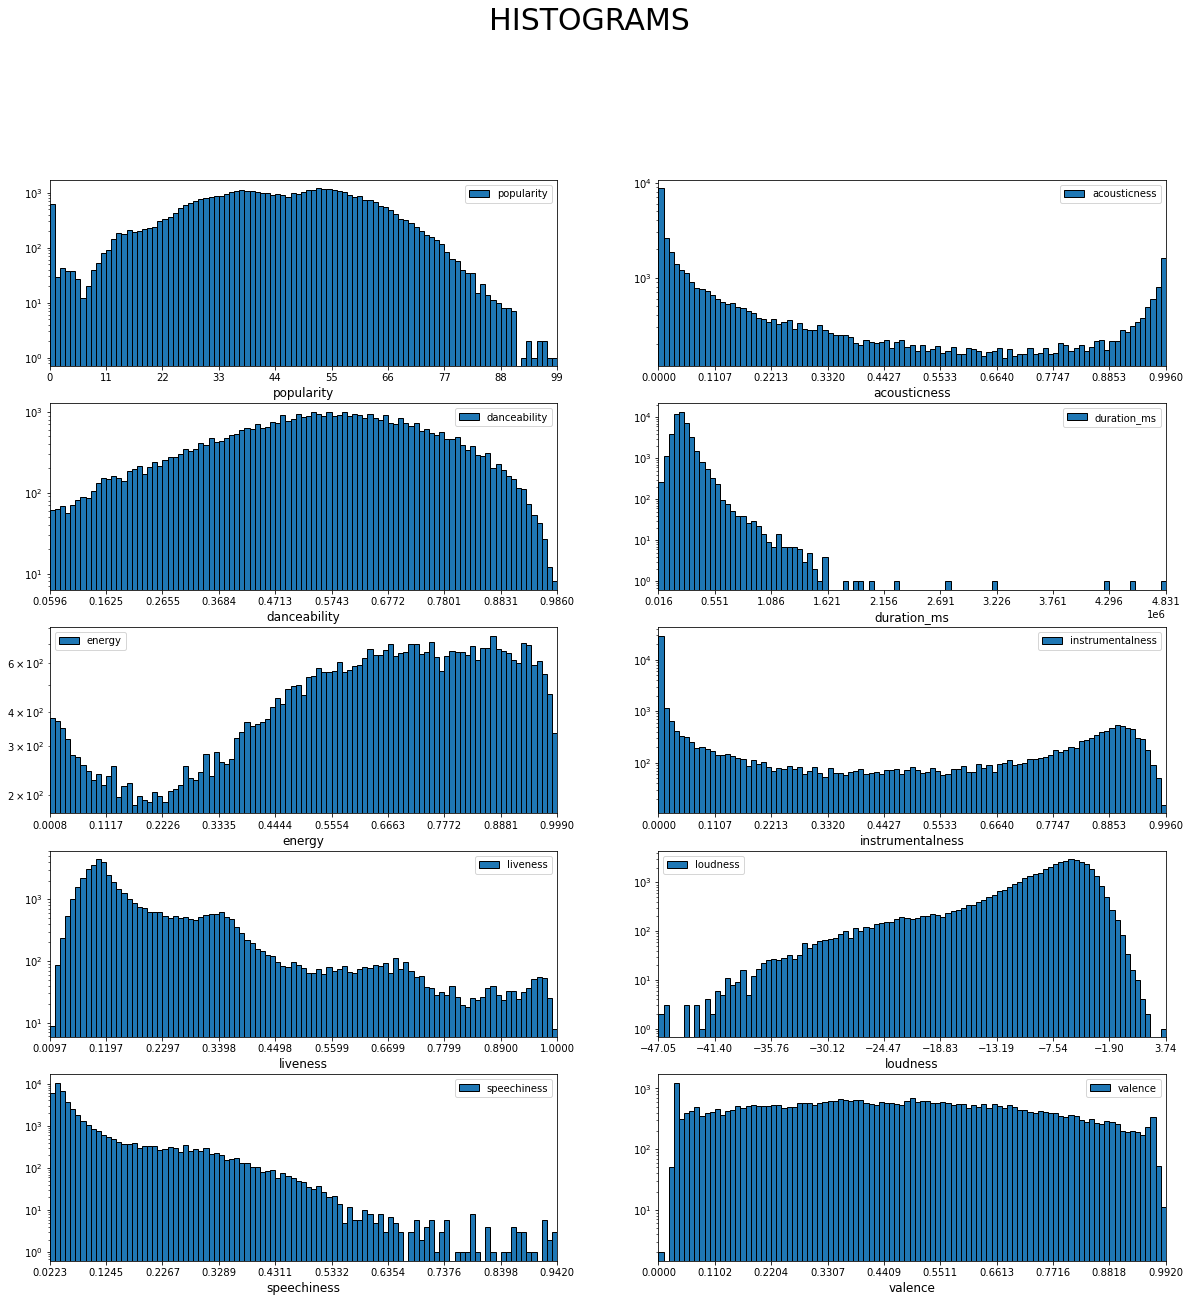

In [16]:
plt.figure(figsize=(20,24))   
plt.suptitle('HISTOGRAMS',size=30)

for i,j in enumerate(features_float64):
    
    plt.subplot(6,2,i+1)
    bins=np.linspace(min(df[j]),max(df[j]),100)
    x_axis=np.linspace(min(df[j]),max(df[j]),10)
    plt.xticks(x_axis)
    
    plt.hist(df[j],bins,edgecolor='k',histtype='bar',log=True,label=j)
    plt.xlim(min(df[j]), max(df[j]))
    plt.xlabel(j,size=12)
    plt.legend();

> **2.2** In order to have the same typical values for each features, we will *normalize* the data with the following tranformation:
$$
X_{norm} = \frac{X - \langle X \rangle}{\sigma_X}
$$
where $\langle X \rangle$ is the mean value of $X$ and $\sigma_X$ is the standard deviation of $X$. Perform this transformation for each variable, store a new column for each tranformed feature, and reproduce the plots above using the normalized features. (2 pts)

First we create a new list with the name of the feature + 'normalized'

In [17]:
features_float64_normalized=[]

for i in features_float64:
    features_float64_normalized.append(i+' normalized')
    
features_float64_normalized

['popularity normalized',
 'acousticness normalized',
 'danceability normalized',
 'duration_ms normalized',
 'energy normalized',
 'instrumentalness normalized',
 'liveness normalized',
 'loudness normalized',
 'speechiness normalized',
 'valence normalized']

Now we create new columns in our data frame with the normalized values for each feature.

In [18]:
#We will use in each time a feature to create its normalized one.
for i,j in zip(features_float64,features_float64_normalized):  
    x_norm=[]
    X=np.mean(df[i])                           #Average of each feature
    sigma_x=np.sqrt(np.var(df[i]))             #Sigma_x variable
    
    for k in df[i]:                                   
        x_norm.append((k-X)/sigma_x)           #Normalizing values and adding in the empty list
    
    df[j]=x_norm                               #For each new normalized feature column, we add their normalized values


The next step is to do the plots. I have also plotted in the histograms the x=0 line to divide the number of values which are above or below the average value of the feature.

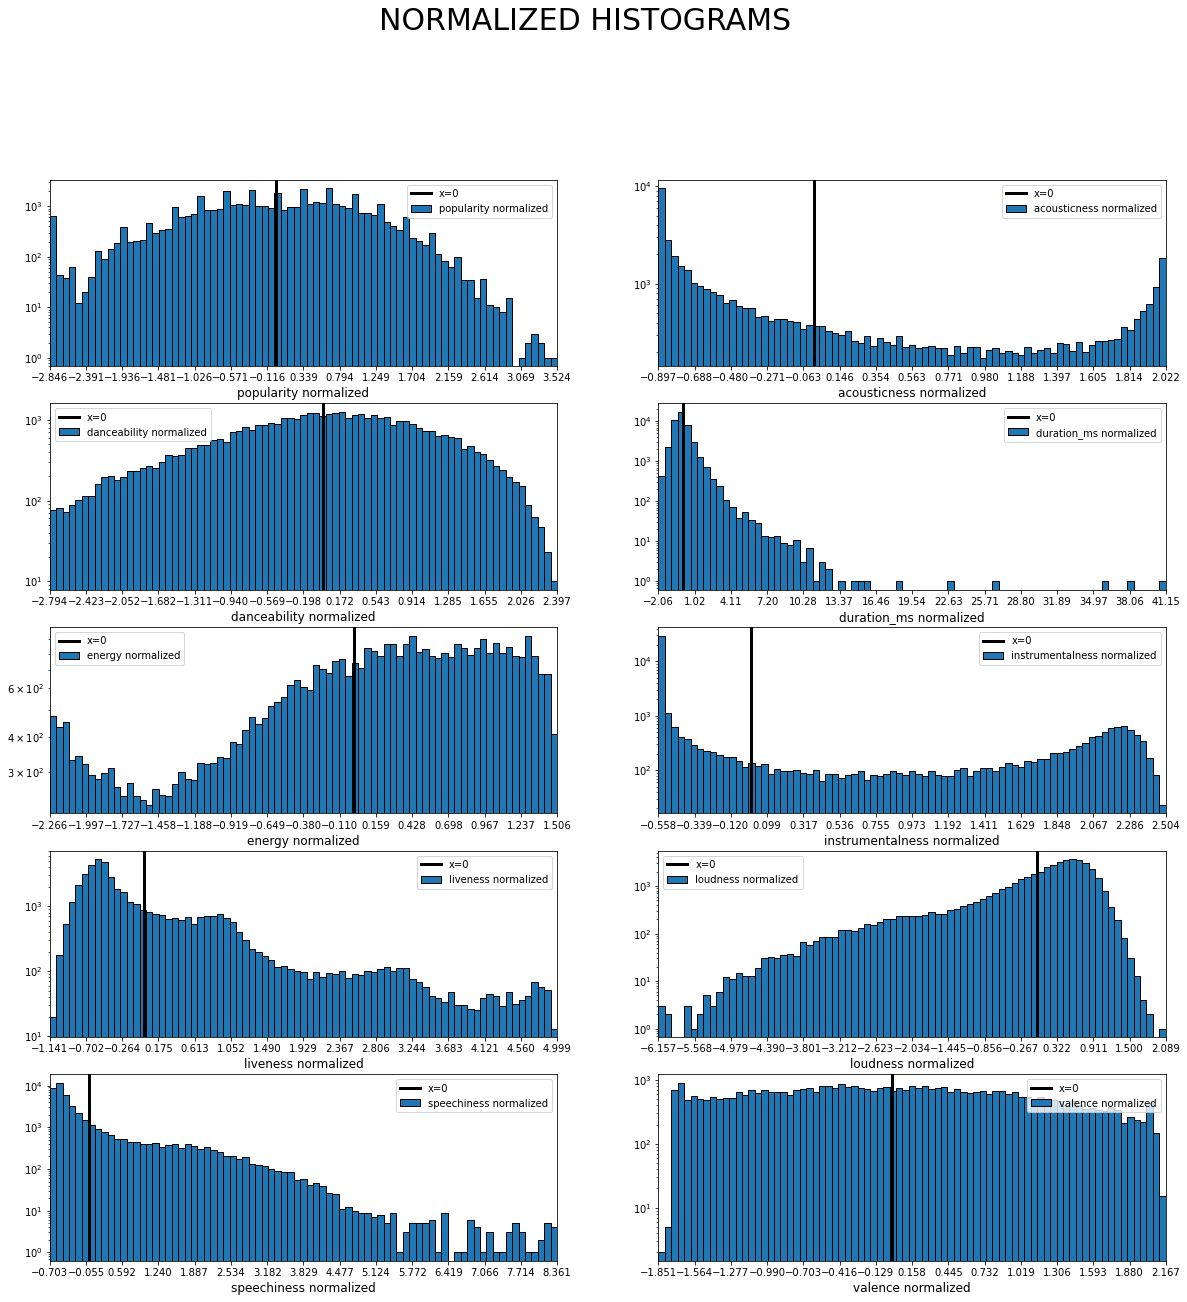

In [19]:
plt.figure(figsize=(20,24))   
plt.suptitle('NORMALIZED HISTOGRAMS ',size=30)  

for i,j in enumerate(features_float64_normalized):
    
    plt.subplot(6,2,i+1)
    bins=np.linspace(min(df[j]),max(df[j]),80)
    x_axis=np.linspace(min(df[j]),max(df[j]),15)
    plt.xticks(x_axis)
    
    plt.axvline(x=0,linewidth='3',label='x=0',color='k')
    plt.hist(df[j],bins,edgecolor='k',histtype='bar',log=True,label=j)
    plt.xlim(min(df[j]), max(df[j]))
    plt.xlabel(j,size=12)
    plt.legend();

**2.3** Compare the distribution of danceability feature for slow and fast songs What would you conclude ? (1.5 pts)

First we have to do a selection of slow and fast songs by its tempo. To convert tempo feature values into a float type, we have to ignore the rows with '?' tempo values.

In [20]:
df_tempo=df[df['tempo']!='?']                        #data frame which only keep the songs with a defined tempo
tempo_float=df_tempo.loc[:,'tempo'].astype(float)    #we convert the tempo values into float64 type.


According to https://es.wikipedia.org/wiki/Tempo, we can consider a fast song above ~ 100bpm

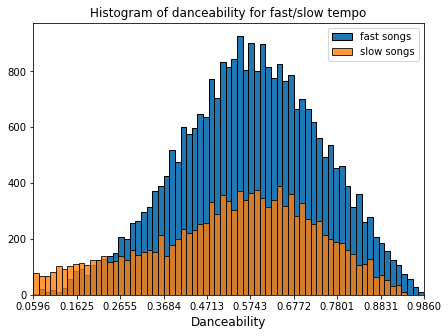

In [21]:
plt.figure(figsize=(7,5))   
fast_songs=df_tempo[tempo_float>100]['danceability']     #danceability values for fast songs
slow_songs=df_tempo[tempo_float<=100]['danceability']    #danceability values for slow songs


minimum=min(df_tempo['danceability'])
maximum=max(df_tempo['danceability'])

bins=np.linspace(minimum,maximum,70)
x_axis=np.linspace(minimum,maximum,10)
plt.xticks(x_axis)
plt.xlim(minimum, maximum)
plt.xlabel('Danceability',size=12)
plt.title('Histogram of danceability for fast/slow tempo')

plt.hist(fast_songs,bins,edgecolor='k',histtype='bar',log=False,label='fast songs',alpha=1)
plt.hist(slow_songs,bins,edgecolor='k',histtype='bar',log=False,label='slow songs',alpha=0.8);

plt.legend();


As we can observe the number of songs with a tempo value above 100bpm is larger than below this limit. The distribution of danceability feature states that either fast or slow songs have mostly intermediate values of this feature, however we notice that low danceability values appear more in slow songs than in fast ones, while in high danceability values occurs the opposite case.

We conclude that the danceability value of a song does not fixed it in a concrete tempo, however for extreme danceability values we observe a correlation between fast-tempo and high-danceability songs, and slow-tempo and low-danceability songs.

> **2.4** Can you identify one or two features which shows a different behaviour across the music genres ? One need to determine what to plot and how to plot it, in order to answer this question (1.5 pts)

We could plot each quantitative feature in an histogram for all music genres, so we can observe if there are differences in the distribution of the feature values among them.

We can see below that for instance popularity and danceability have different distributions for each type of music, i.e., the value distribution is more caotic (they have different behaviour across the music genres). In contrast, in features like liveness, speechiness or duration_ms, we can observe a similar distribution.

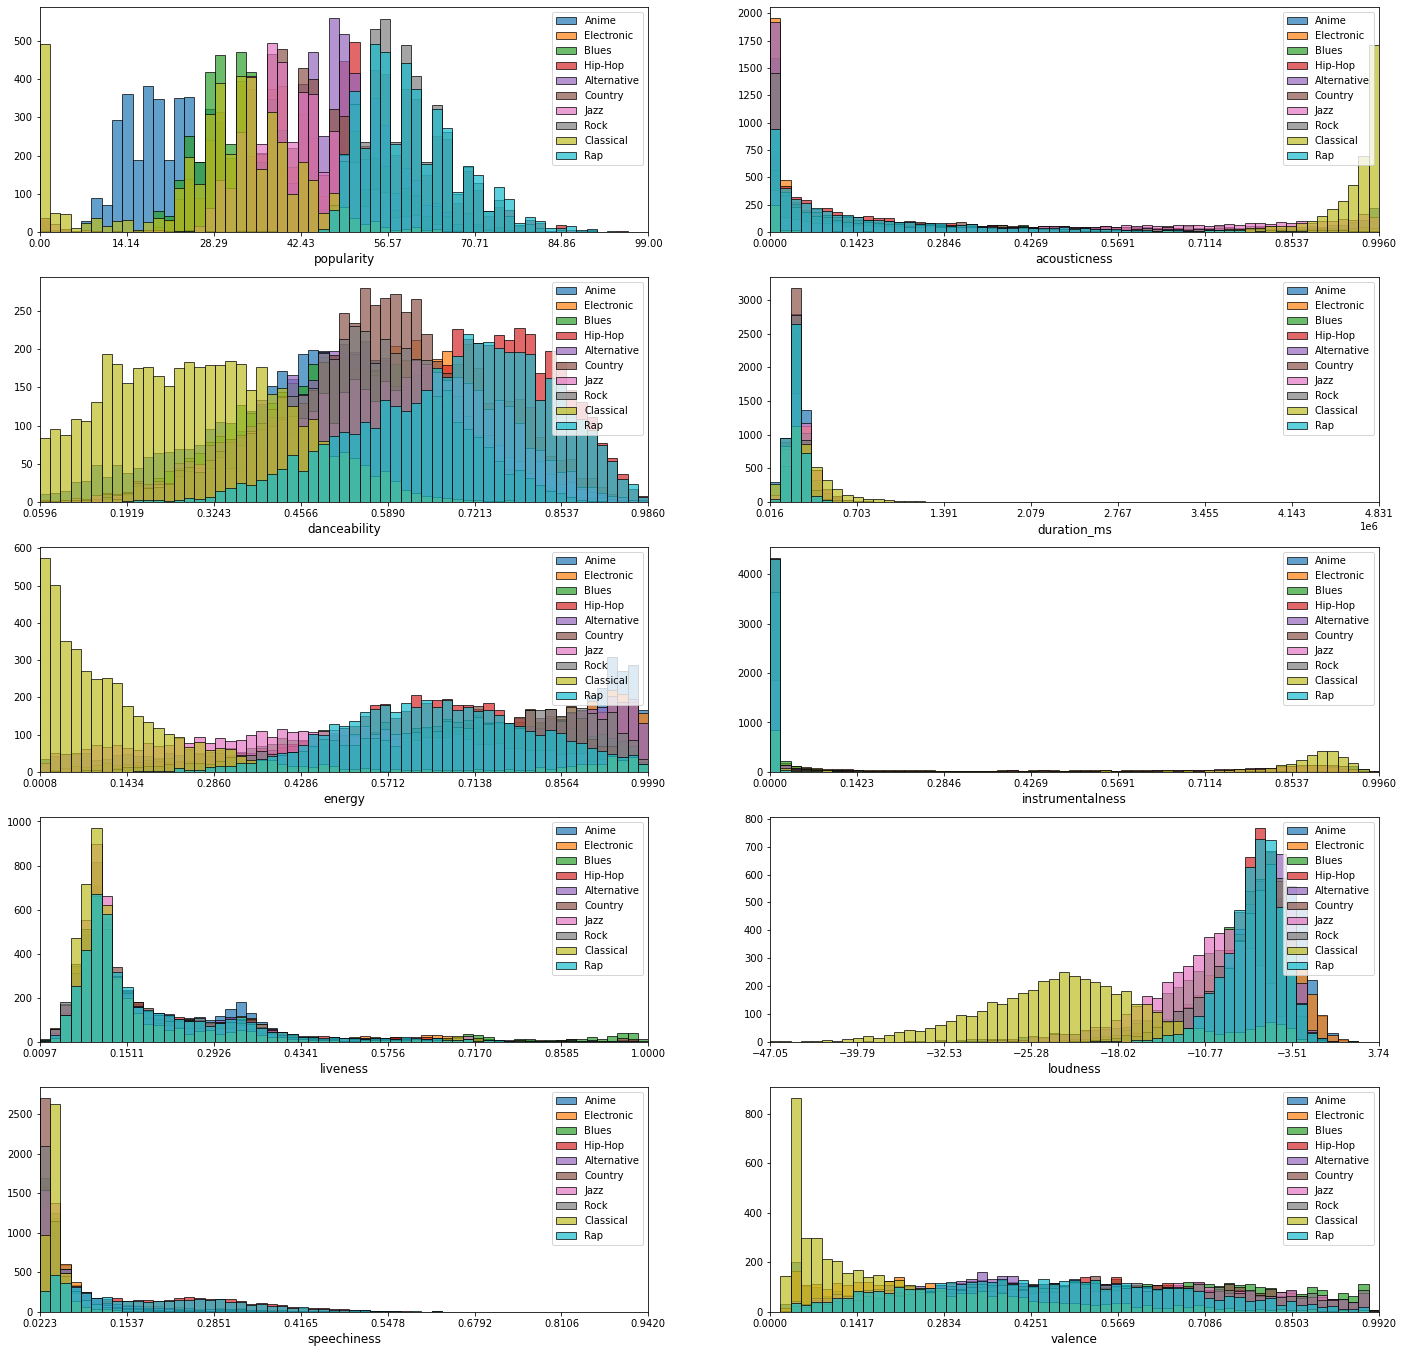

In [22]:
plt.figure(figsize=(24,24))

for l,k in enumerate(features_float64):               #for each feature
    for i in music_genre:                             #we plot for every music genre
         
        
        minimum=min(df[k])                            #min and max value in date set for each feature
        maximum=max(df[k])
        
        plt.subplot(5,2,l+1)                          #In each subplot we want to have the same feature (k) for all genres (i)
        x_axis=np.linspace(minimum,maximum,8)
        
        
        plt.hist(df[df['music_genre']==i][k],label=i,bins=np.linspace(minimum,maximum,60),edgecolor='k',alpha=0.7)
        plt.xticks(x_axis)
        plt.xlim(minimum, maximum)
        plt.xlabel(k,size=12)
        plt.legend(loc=1)
    

> **2.5** One important aspect in data analysis is to avoid redundant, or correlated, features. Can you identify which the pairs of features which seems fully or partially redundant ? One would use two differents methods:
 1. numeric: by computing the correlation matrix of the features
 2. graphic: by plotting the 2D plots of each feature pairs

Can you interpret what you see ? (3 pts)

We will compute the correlation matrix of the features and afterwards do 2D plot of each feature pairs.

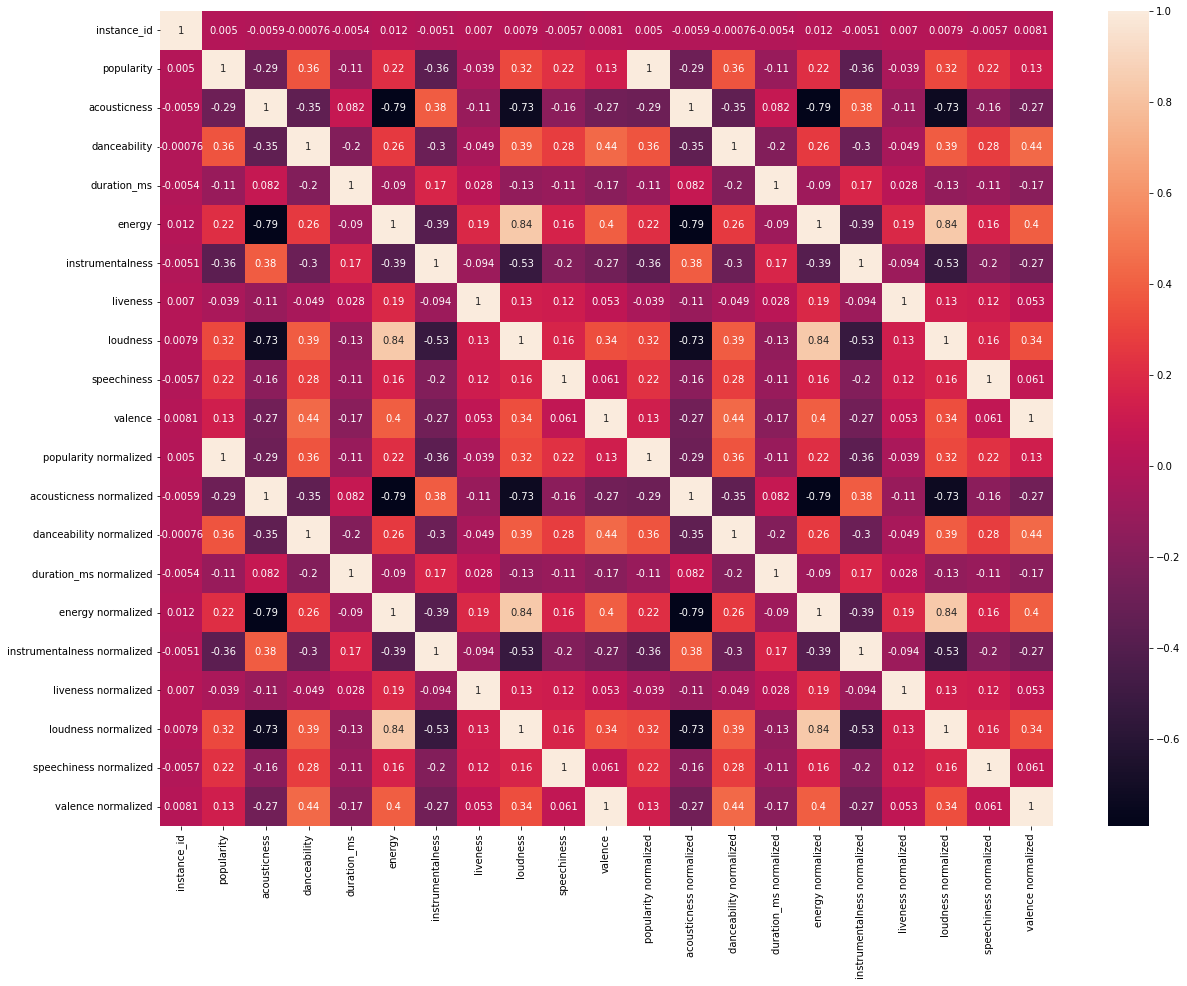

In [23]:
plt.figure(figsize=(20,15))
import seaborn as sn

c_matrix=df.corr()
sn.heatmap(c_matrix,annot=True);

As we observe, fully correlation occurs when we have each variable with itself, and with itself normalized (as it should be obvious).

We can see different grades of correlation. We apply the condition to the variables to be strongly correlated ~ (0.7 < x < 1.0). We find out that `energy` and `loudness` are strongly correlated with a value of 0.84.

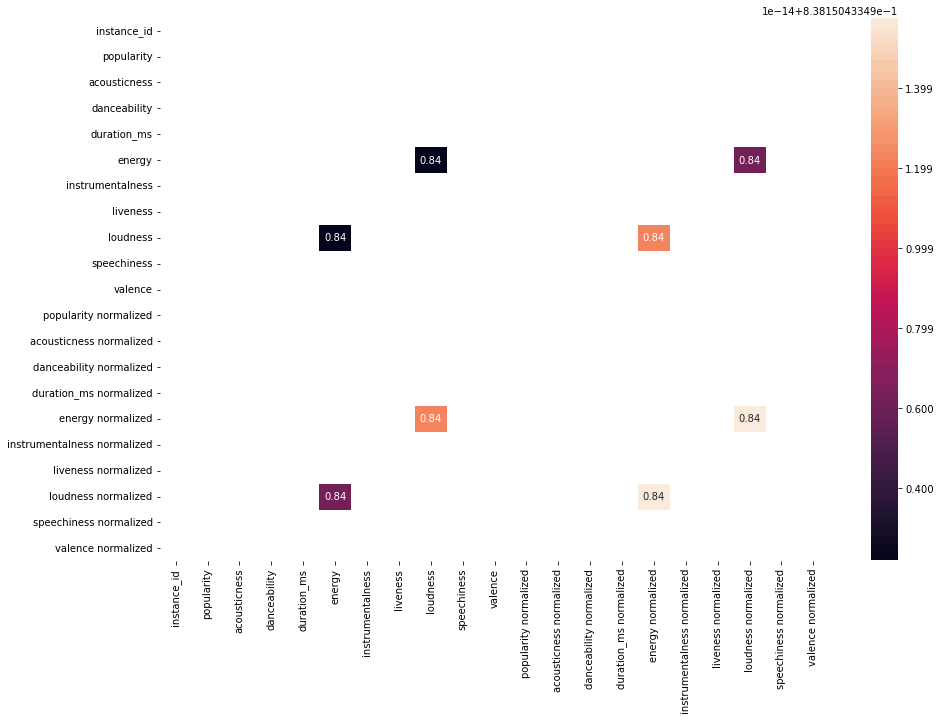

In [24]:
plt.figure(figsize=(15,10))
sn.heatmap(c_matrix[(c_matrix>0.7)&(c_matrix<0.99)],annot=True);

We plot `energy` and `loudness` feature pair and it can be seen that effectively, it exits correlation between these features, especially from values of `energy` > 0,4 and `loudness` > -10, where we see more presence of points which converges in some type of correlation.

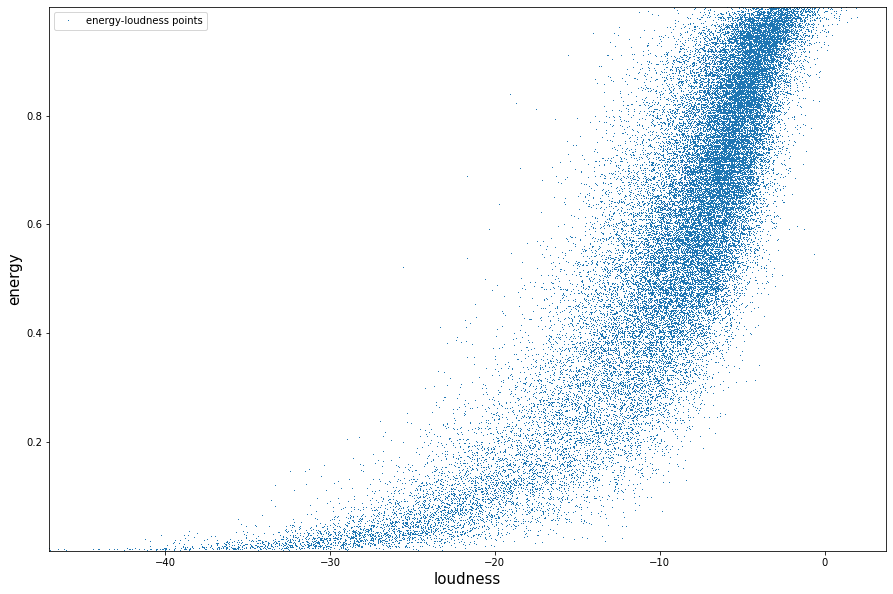

In [25]:
plt.figure(figsize=(15,10))

plt.plot(df['loudness'],df['energy'],',',label='energy-loudness points')

plt.ylim(min(df['energy']), max(df['energy']))
plt.xlim(min(df['loudness']), max(df['loudness']))

plt.ylabel('energy',size=15)
plt.xlabel('loudness',size=15)

plt.legend();

Moreover, we can also find features which are partially or medium correlated (0.4 < x < 0.7). These are the cases for:

- `Energy`  and  `valence` (0.40)

- `Danceability`  and  `valence` (0.44)

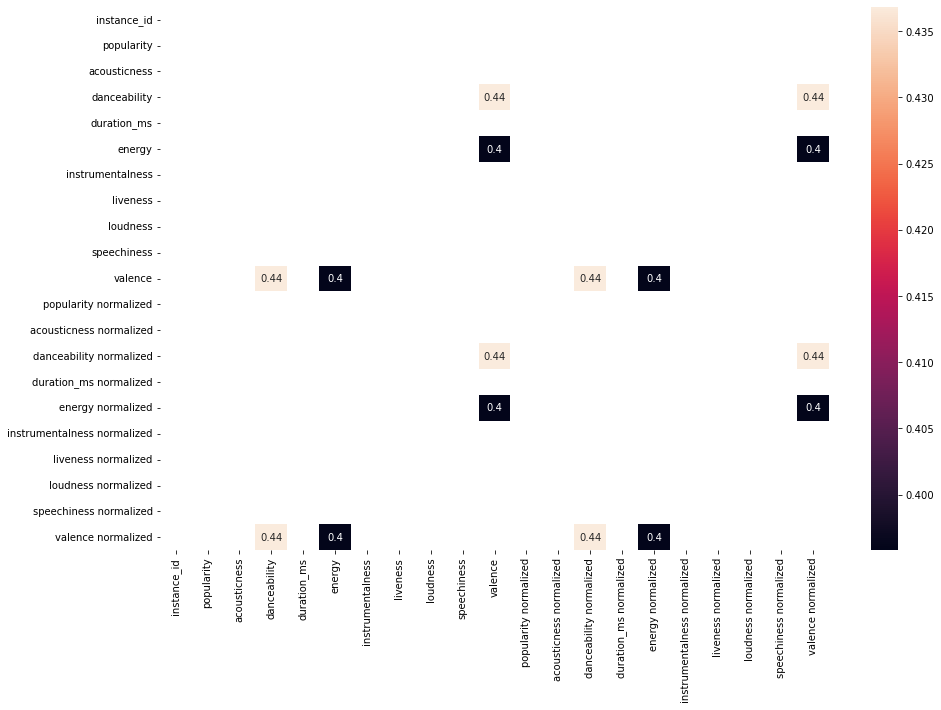

In [26]:
plt.figure(figsize=(15,10))
sn.heatmap(c_matrix[(c_matrix>0.39)&(c_matrix<0.7)],annot=True);

As before we do the plots for the partially correlated features.

Histograms of partially correlated features:


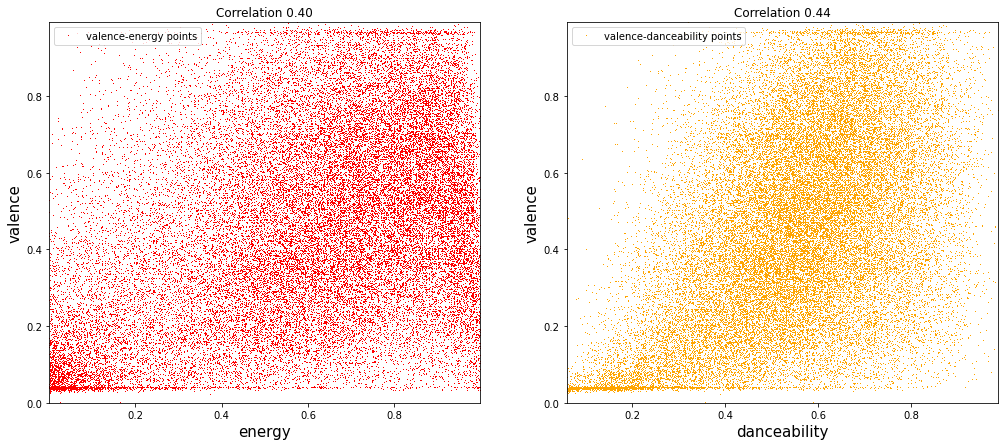

In [27]:
print('Histograms of partially correlated features:')

plt.figure(figsize=(17,7))


plt.subplot(1,2,1)
plt.title('Correlation 0.40')
plt.plot(df['energy'],df['valence'],',',label='valence-energy points',color='red')
plt.xlim(min(df['energy']), max(df['energy']))
plt.ylim(min(df['valence']), max(df['valence']))
plt.xlabel('energy',size=15)
plt.ylabel('valence',size=15)
plt.legend(loc=2);



plt.subplot(1,2,2)
plt.title('Correlation 0.44')
plt.plot(df['danceability'],df['valence'],',',label='valence-danceability points',color='orange')
plt.xlim(min(df['danceability']), max(df['danceability']))
plt.ylim(min(df['valence']), max(df['valence']))
plt.xlabel('danceability',size=15)
plt.ylabel('valence',size=15)
plt.legend(loc=2);



We observe the scattering in the values because the features are not very correlated.

> **2.6** Can you compare all feature distributions for songs with a defined tempo and those without a defined tempo ? What do you conclude ? (1 pts)

Note: as there are less undefined tempo songs, we apply the function log to the y-axis in order to see clearer the comparation.

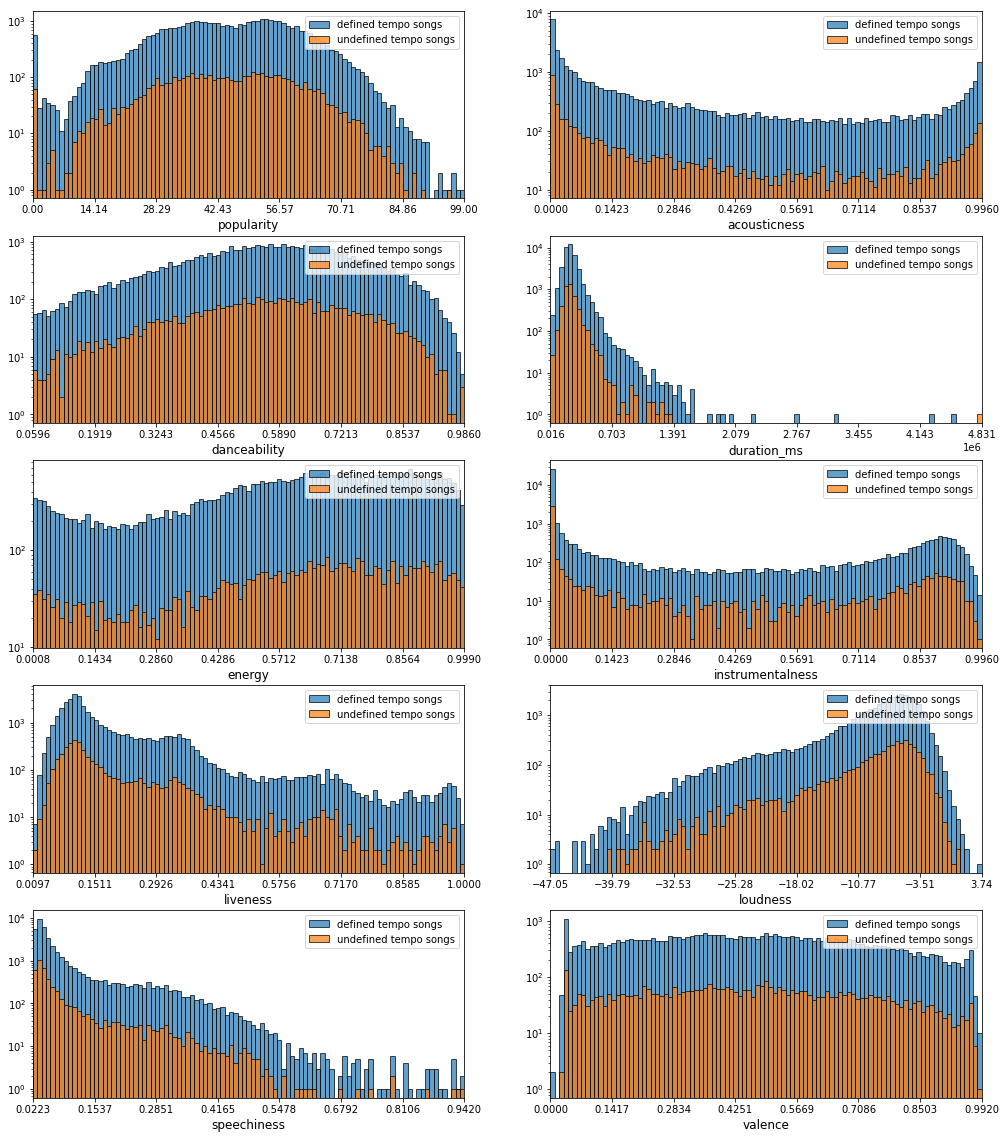

In [28]:
df_tempo=df[df['tempo']!='?']
df_notempo=df[df['tempo']=='?']


plt.figure(figsize=(17,20))

for j,i in enumerate(features_float64):  # For each feature, plot an histogram for tempo/no tempo songs
    
    minimum=min(df[i])                   # Min and max values in data set for each feature
    maximum=max(df[i])
        
    plt.subplot(5,2,j+1)                 # In each subplot we want to have the same feature (k) for all genres (i)
    
    plt.hist(df_tempo[i],bins=np.linspace(minimum,maximum,100),edgecolor='k',alpha=0.7,label='defined tempo songs',log=True)
    plt.hist(df_notempo[i],bins=np.linspace(minimum,maximum,100),edgecolor='k',alpha=0.7,label='undefined tempo songs',log=True)
   
    x_axis=np.linspace(minimum,maximum,8)  
    plt.xticks(x_axis)
    plt.xlim(minimum, maximum)
    plt.xlabel(i,size=12)
    plt.legend(loc=1)    


I can conclude that either defined or undefined tempo songs have the same distribution for all features.

## 3. Toward a predictive model (7 pts)

> **3.1** Plot the energy *versus* the loudness for all songs inclusively, and then for each music genre separately. What do you observe (one or several observations are possible) ? (2 pts)

Firstly, we plot for all songs, no matter the genre.

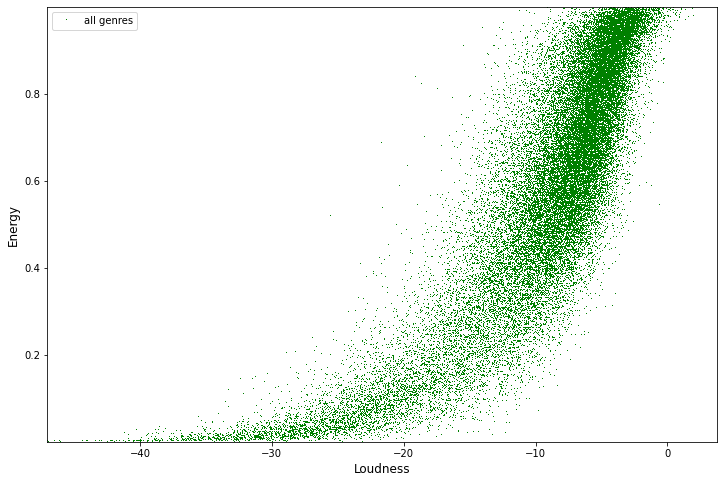

In [29]:
plt.figure(figsize=(12,8))

plt.plot(df['loudness'],df['energy'],',',color='green',label='all genres')

plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)

plt.xlim(min(df['loudness']), max(df['loudness']))
plt.ylim(min(df['energy']), max(df['energy']))
plt.legend();

We can see, as we said before, a important correlation between these features.
Now we take into account the music genre:

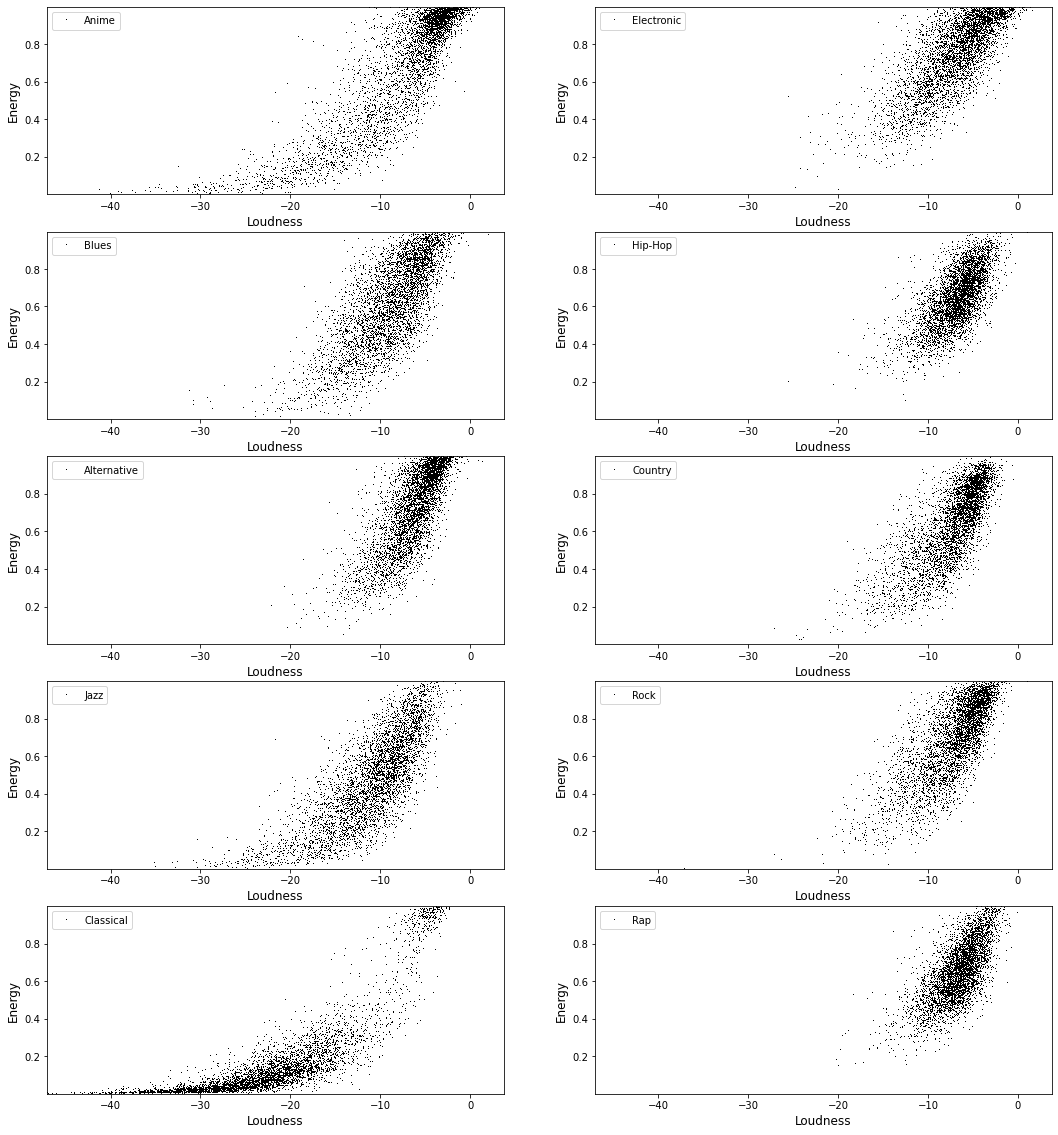

In [30]:
plt.figure(figsize=(18,20))

for l,i in enumerate(music_genre):             #for each music genre
    
    plt.subplot(5,2,l+1)
    
    Y=df[df['music_genre']==i]['energy']
    X=df[df['music_genre']==i]['loudness']
    
    plt.ylabel('Energy',size=12)
    plt.xlabel('Loudness',size=12)

    plt.xlim(min(df['loudness']), max(df['loudness']))
    plt.ylim(min(df['energy']), max(df['energy']))
    
    
    plt.plot(X,Y,',',label=i,color='black')
    plt.legend();
    
    

We can state that correlation of this feature pair exists for each music genre separately.

Moreover, we notice that some music genres like rap, rock, country, hip-hop or electronic music have higher values of energy and so of loudness. There are other like blues and jazz music which have well distributed values of energy and for last, classical music has lower values of energy and loudness.

> **3.2** Define a mathematical model which could reasonably well model the dependendy of the loudness with the energy. This model must have at least 2 free parameters, to be adjusted later on. (1 pts)

At first time, I tried with a hyperbolic tangent, whose origin would be in (x,y)=(-10,0.5), however it did not fit very well on the extremes of the cloud of points. Then, I suggest another function more simplified, which could be a polynomial of degree 2 (parabola).

In [31]:
def polynomial(x,p0,p1,p2):
    return p0+p1*x+p2*x**2

The number of free parameters in our fit are 3.

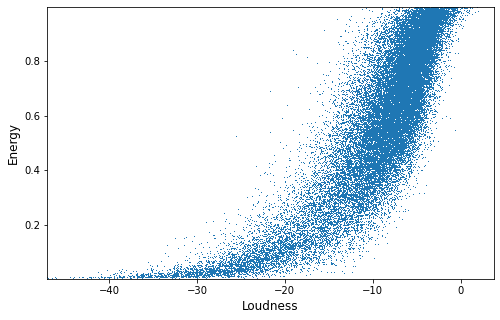

In [32]:
X=np.array(df['loudness'])
Y=df['energy']

plt.figure(figsize=(8,5))
plt.plot(X,Y,',')
plt.xlim(min(df['loudness']), max(df['loudness']))
plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12);


We observe that there are many points which may have the same value of energy for a fixed value of loudness and viceversa.

We try to mean over the values of loudness for a fixed value of energy to see clearer the dependency curve of this pair of features. With the code below, we mean over the values of loudness for a fixed value of energy.

In [33]:
mean_loudness=[]
mean_energy=[]
var_x=[]

for i in df['energy']:
    if i in mean_energy:            #If the energy value is repeated, then it is skipped
        j=1
    else:
        mean_loudness.append(np.mean(df[df['energy']==i]['loudness']))
        mean_energy.append(i)

A=[mean_loudness,mean_energy]

Then, we keep these mean values of loudness for each value of energy and plot it in the same figure with all the points of the pair energy-loudness. 

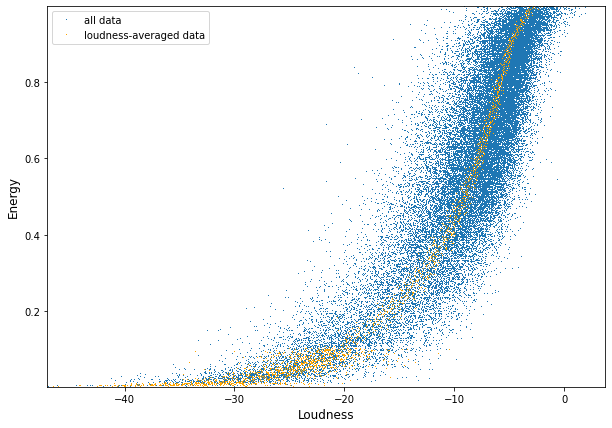

In [34]:
plt.figure(figsize=(10,7))

plt.plot(X,Y,',',label='all data')
plt.plot(A[0],A[1],',',color='orange',label='loudness-averaged data')

plt.xlim(min(df['loudness']), max(df['loudness']))
plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)
plt.legend();


> **3.3** Define a loss function which describes how well the model describe the data, for a give value of the paramters. Plot this loss function *versus* the first parameter, when the other were fixed to a value of your choice. (2 pts)

If we want to know how well our parabola describe the data, we should compute the funcion $\chi^{2}\$, which compares the value of our fit with the value of the point's cloud.

$$
\chi^{2} =\sum_{i=1}^{n} (\frac{y_{i} - \ f_{i} }{\sigma_{yi}})^2
$$

For this purpose, we need a function of the data points ($y_{i}$) to compare our fit (parabola $f_{i}$ ) with. This function ($y_{i}$) could be obtained making averages over the energy values for each fixed loudness value, in order to compute the funcion $\chi^{2}$ which needs the variance of each energy value $\sigma_{yi}^2$. This compute consist in averaging over the energy values for a fixed loudness value, so it's the complementary of the one we did before (averaging over the loudness values).


In [35]:
#Here we compute the funcion yi, meaning over the values of energy for a fixed value of loudness

x_loudness=[]     
mean_energy1=[]
var_y1=[]
for i in df['loudness']:
    if i in x_loudness:   #this is because we don't want to repeat values, so if they are already in the list, we just skip them
        j=1
#we don't keep loudness values which corresponds only to a unique energy value, because the variance function gives a 0 and the chi function crashes.    
    elif np.var(df[df['loudness']==i]['energy'])!=0:    
        var_y1.append(np.var(df[df['loudness']==i]['energy']))
        mean_energy1.append(np.mean(df[df['loudness']==i]['energy']))
        x_loudness.append(i)

B=[x_loudness,mean_energy1]

If we plot the function $y_{i}$, we obtain a similar distribution of data but now the points are more fixed into the curve that fits the model. As we have now a unique value of loudness which it is associated to one averaged energy value, we are able to compare the two functions( $y_{i}$ and  $f_{i}$ ) using $\chi^{2}$.

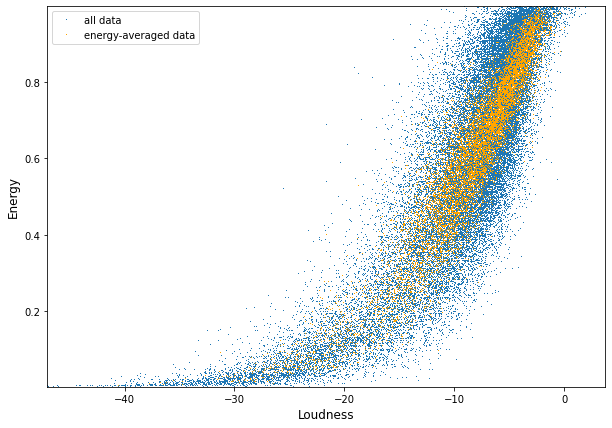

In [36]:
plt.figure(figsize=(10,7))

plt.plot(X,Y,',',label='all data')
plt.plot(B[0],B[1],',',color='orange',label='energy-averaged data')
plt.xlim(min(df['loudness']), max(df['loudness']))
plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)
plt.legend();


It's time to define a function for $\chi^{2}$ :

In [37]:
#the input values of x for the polynomial function (fit function) will be the x_loudness values calculated above
#(these are the not-repeated values of loudness in data frame)

def chi(p0,p1,p2):
    return np.sum((polynomial(np.array(x_loudness),p0,p1,p2)-np.array(mean_energy1))**2/np.sqrt(var_y1))

chi=np.vectorize(chi)  #vectorize the function

Now we fix parameters $p_{1}$,$p_{2}$ and plot $\chi^{2}$ function versus the firs parameter $p_{0}$ :

The parameter p0 which minimizes the function is 1.0606, and it`s the one that fits better the data.


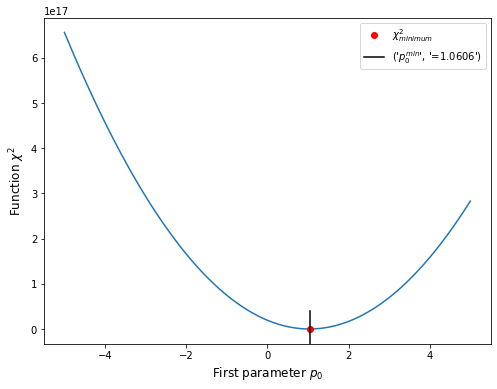

In [38]:
plt.figure(figsize=(8,6))

p1,p2=0.062,0.001           #p1,p2 parameters are fixed 
x=np.linspace(-5,5,100)     #possible values of the first parameter p0

plt.plot(x,chi(x,p1,p2)) 
x_m=x[np.argmin(chi(x,p1,p2))]

plt.plot(x_m,min(chi(x,p1,p2)),'o',color='red',label='$\chi_{minimum}^{2}$')
plt.axvline(x_m,ymin=0,ymax=0.1,color='black',label=('$p_{0}^{min}$','={:.4f}'.format(x_m)))
plt.xlabel('First parameter $p_{0}$',size=12)
plt.ylabel('Function $\chi^{2}$',size=12)
plt.legend();

print('The parameter p0 which minimizes the function is {:.4f}, and it`s the one that fits better the data.'.format(x_m))

We can observe in the next plot that the parabola with the best value for $p_{0}$ (the red one), is the best which describes the data, however it's not fully fit it because the values of the other 2 parameters $p_{1}$,$p_{2}$ are not yet the best ones.

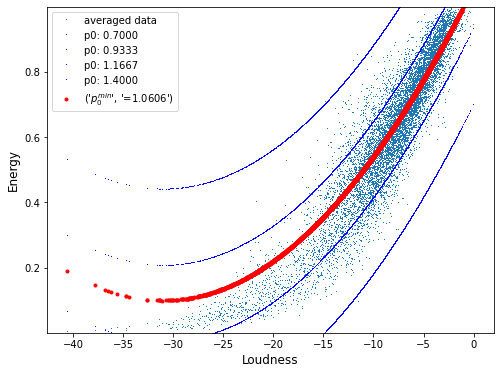

In [39]:
plt.figure(figsize=(8,6))

plt.plot(B[0],B[1],',',label='averaged data')
values_p0=np.linspace(0.7,1.4,4)

for i in values_p0:
    plt.plot(x_loudness,polynomial(np.array(x_loudness),i,p1,p2),',',color='blue',label='p0: {:.4f}'.format(i))

plt.plot(x_loudness,polynomial(np.array(x_loudness),x_m,p1,p2),'.',color='red',label=('$p_{0}^{min}$','={:.4f}'.format(x_m))) 

plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)
plt.legend();

> **2.5** Using the `scipy.optimize` module, find the best value of the parameter which describes the data:
 + in an inclusive way (all music genres together)
 + for each music genre
 
Do you think you can identify the genre of a song based of its loundess and energy values ? (2 pts)

We create a function to find out the best values in a fit of a curve with N parameters.

In [40]:
from scipy import optimize

#N is the number of free parameters, also we initialize the first parameter to p0=1 because the computing needs an inital value
def model(N,function,X,Y):
    coefi=optimize.curve_fit(polynomial,X,Y,**{'p0':[1]*N,'bounds':([-10]*N, [10]*N),'check_finite': True})
    return coefi[0]

We do a plot to compare the previous approximated fit and then the fit with the best parameters taken from optimize command: 

Parameters approximated fit --->  p0=1.060606,  p1=0.062000, p2=0.001000
    Parameters best fit     --->  p0=1.081119,  p1=0.066087, p2=0.001010


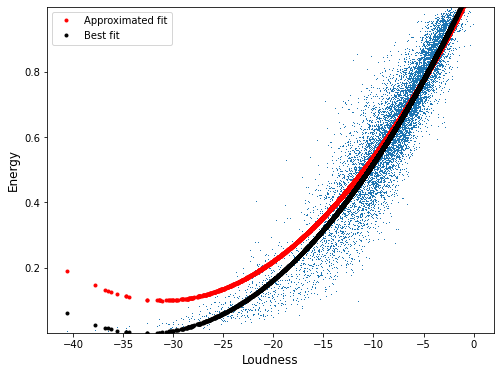

In [41]:
plt.figure(figsize=(8,6))

plt.plot(B[0],B[1],',')
plt.plot(x_loudness,polynomial(np.array(x_loudness),x_m,p1,p2),'.',color='red',label='Approximated fit') 
plt.plot(x_loudness,polynomial(np.array(x_loudness),*model(3,polynomial,X,Y)),'.',color='black',label='Best fit')

plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)
plt.legend();

print('Parameters approximated fit --->  p0={:.6f},  p1={:.6f}, p2={:.6f}'.format(x_m,p1,p2))
print('    Parameters best fit     --->  p0={:.6f},  p1={:.6f}, p2={:.6f}'.format(*model(3,polynomial,X,Y)))

Now, the inputs argument in the model function for X,Y must be the data of each music genre.

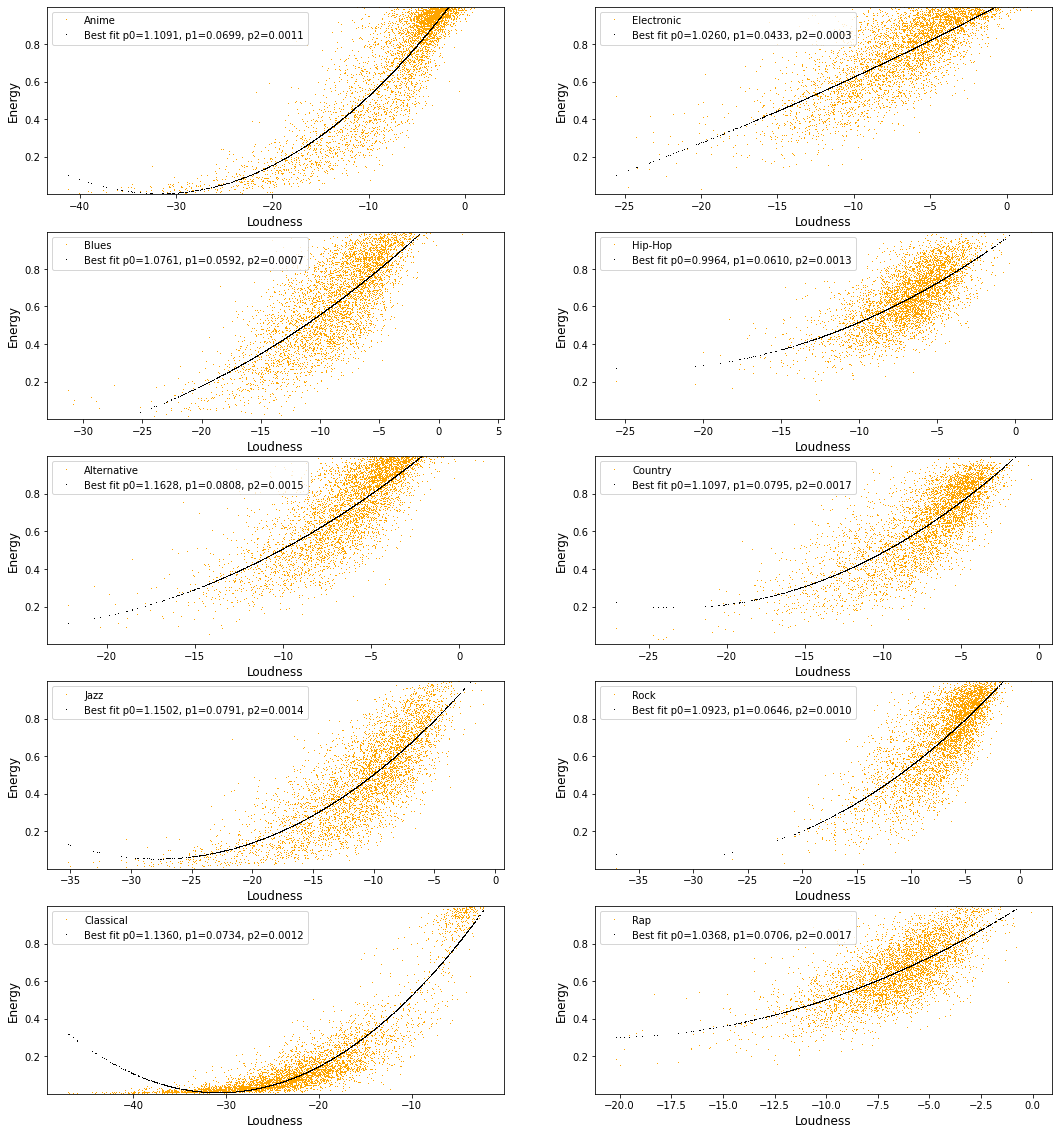

In [42]:
plt.figure(figsize=(18,20))

mean_energy=[]  
mean_loudness=[] 

for l,i in enumerate(music_genre):
    genre=df[df['music_genre']==i]     #data for each genre
    
    coef_opt=model(3,polynomial,genre['loudness'],genre['energy']) 
   
    plt.subplot(5,2,l+1)
    plt.plot(genre['loudness'],genre['energy'],',',label=i,color='orange')
    plt.plot(genre['loudness'],polynomial(genre['loudness'],*coef_opt,),',',color='black',label='Best fit p0={:.4f}, p1={:.4f}, p2={:.4f}'.format(*coef_opt))
    plt.ylim(min(df['energy']), max(df['energy']))
    plt.ylabel('Energy',size=12)
    plt.xlabel('Loudness',size=12)
    plt.legend(loc=2);
    
    mean_energy.append(np.mean(genre['energy']))     #we keep the averages of loudness and energy for each music genre
    mean_loudness.append(np.mean(genre['loudness'])) #because we will use in the question of identifying a music genre by its values  

As we see in the graphics, the dependence is more or less similar for all music genres (they can be fitted with parabolas but slightly different parameter values), because if it wasn't then we wouldn't encounter a dependence for all the music data points. So, what I mean is that the dependence between energy and loudness is not caused because the music genre but the inner properties of these two features.

One thing which changes from one music genre to another is that the distribution of the points is different. For instance, we have higher energy levels (and so of loudness) in anime or rock music, however we encounter more low energy levels in classical music. We can use this diffence in the distribution of the data points to identify a music genre. For this reason, I suggest averaging over the values of energy and loudness for each music genre and if each pair of mean values are different from the other it will be a point for distinguish them. 


We plot the averaged pair energy-loudness for each music genre:

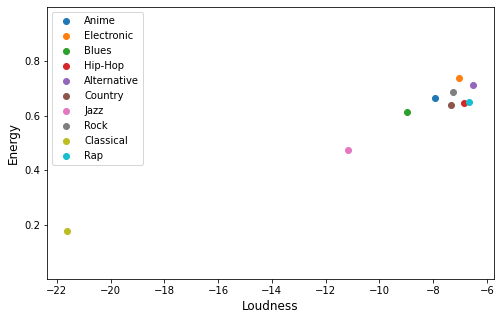

In [43]:
list_mean_values=[mean_loudness, mean_energy]

plt.figure(figsize=(8,5))

for i,j,l in zip(list_mean_values[0],list_mean_values[1],music_genre):
    plt.plot(i,j,'o',label=l)
    k=+1

plt.ylim(min(df['energy']), max(df['energy']))
plt.ylabel('Energy',size=12)
plt.xlabel('Loudness',size=12)
plt.legend(loc=2);
plt.legend();

As we can see, except classical music and maybe jazz, it is very difficult to identify a certain music genre based of its loudness-energy values, because they seem quite similar, especially for the ones at the right-side of the plot (alternative, electronic, hip-hop, rap, country, rock, ...). 
It makes sense that hip-hop and rap (red and cyan colour points) are very similar in terms of type of music and so its mean values are really close.

## 4. Bonus question (3 pts)

> Using the tool of you choice, can you build a model which predicts the music genre, knowing all the features of a song ? One would try to caracterize the quality of the classifier model.

This model is about to predict the music genre of a given random song of the data set. For this purpose, we suggest computing, for each music genre, information about the average and variance for all quantitative features, so we can relate those statistics values with each type of music. After do this, we have to compare the calculated statistics values (average and variance) of the features of each music genre with the feature values of the random song, which is what `difference` function below does. Later, with all these values we will do a sum.

In [44]:
def difference(x,average,variance):
    return (x-average)**2/variance

The point is that the smaller the sum given by the results `difference` function, the more probability we encounter to success with the music genre. Then, we have to find the minimum value. As we will se, this model is not perfect, because it works with statistics values and this means that if we introduce a random song whose values are a bit far from the statistics values of its music genre, then our model could fail. But we also include a code, to check if the music genre prediction is wrong and it gives you the attempts which have been done until get the correct one. In this way, we could know the quality of our classifier model.

This model gives you in this order: the music genre of the chosen song , the classifier model's genre prediction and the number of attempts until the model finds the correct genre. The last output it's the list_plot which will be used below.

In [45]:
def identify_song(Num):                                      #The chosen song for finding out its genre, will called as df.iloc[Num] with Num a number between [0,45061) 
    
    list_plot=[]                                             #Here we will keep the sum of all the feature results for each music genre
    number_attempts=[]
    
    for i in music_genre:                                    #For each music genre      
        d_data=[]
        genre=df[df['music_genre']==i]

        for k in features_float64:                            #For each feature
                                                              #Difference function compute a result for each feature of certain music genre
                d_data.append(difference(df.iloc[Num][k],np.mean(genre[k]),np.var(genre[k]))) 
            
        list_plot.append(np.sum(d_data))                      #We sum all the values given by difference function for a certain music genre
                                                              #List_plot contais the sum for each music genre and the smallest value of them, will be the one with more probability to be the correct music genre.
    index_first=np.argmin(list_plot)                          #We get the index of the minimum value of the list. 
    index=index_first
    a=1                                                       #If it is correct at the first attempt, keep a=1
    
    while music_genre[index]!=df.iloc[Num]['music_genre']:    #We check that the predicted music genre matches with the one of our song
        index=list_plot.index(sorted(list_plot)[a])           #If it's not, then we search the next minimum value on the list_plot until it matches with the correct one
        a+=1   
    
    number_attempts.append(a)
    
    return df.iloc[Num]['music_genre'],music_genre[index_first],number_attempts,list_plot


Here we will see graphic examples of how our model works. We define a plot function which show the list_plot and so the probabilities to choose one music genre or another as the correct one, using our function model : identify_song from above.

In [46]:
def plot_example(Num):
    
    plt.figure(figsize=(10,5))
    print('Our model gives us the next results:',identify_song(Num)[:3])   #we print the first three outputs.
    
    list_plot=identify_song(Num)[3]

    for j,i in enumerate(list_plot):
        plt.plot(music_genre[j],i,'o',label=music_genre[j])  
       
    plt.legend()

If we choose for example the song with index 3, we obtain:

Our model gives us the next results: ('Electronic', 'Electronic', [1])


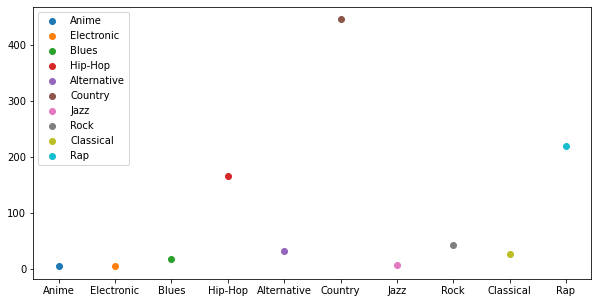

In [47]:
plot_example(3)

As we see the model has gone correct at the first attempt. The music genres with larger values (i.e. Country in this case) are less probable to be the correct one.

Other example with song with index 3930. This is an example in which our model fails, (it is correct at the fourth attempt). These are the kind of songs that maybe are far from the statistics values of its music genre.

Our model gives us the next results: ('Electronic', 'Anime', [4])


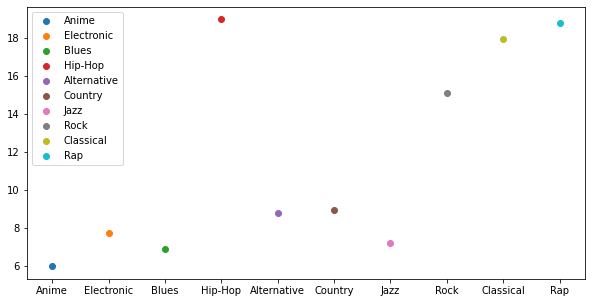

In [48]:
plot_example(3930)

For last, we can do an histogram to show how many songs (within a interval of 50 songs) our model predicts well at the first attempt. We can change the interval in which we want to now the precision of our classifier model.

number of successful attempts to reach the correct result: 30 (60.0%) 


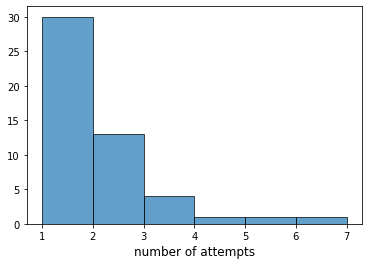

In [49]:
attempts=[]

for i in range(50,100):
    attempts.append(identify_song(i)[2])  #we keep the number of attempts which the model has done until predicting well the music genre

plt.hist(np.array(attempts),bins=np.linspace(1,7,7),edgecolor='k',alpha=0.7)
plt.xlabel('number of attempts',size=12);

n=0

for i in attempts:
    if i==[1]:
        n+=1
    
print('number of successful attempts to reach the correct result: {} ({}%) '.format(n,n/len(attempts)*100))

We can conclude that our model is not very precise, but it could be useful.
**Remember that the model works if the song is not very far from the statistical values.**